## 1. Write a function, select_kbest_freg() that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
from sklearn.feature_selection import SelectKBest, f_regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
total_charges      1685 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 65.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [2]:
df = wrangle.wrangle_telco()
X = df.drop(columns=['total_charges', 'customer_id'])
y = pd.DataFrame(df.total_charges)


x_train,x_test,y_train,y_test=split_scale.split_my_data(X,y)
#X_train

In [3]:
def select_kbest_freg(x_train, y_train, k):

    f_selector = SelectKBest(f_regression, k)

    f_selector.fit(x_train, y_train)

    f_support = f_selector.get_support()
    f_feature = x_train.loc[:,f_support].columns.tolist()
    
    return f_feature


select_kbest_freg(x_train,y_train, 2)
    #print(str(len(f_feature)), 'selected features')
    #print(f_feature)
  

['monthly_charges', 'tenure']

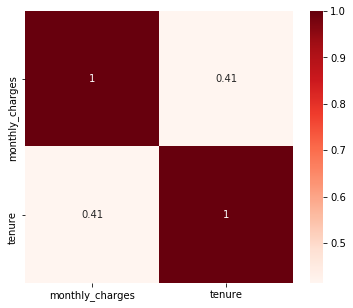

In [4]:
plt.figure(figsize=(6,5))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Write a function, select_kbest_freg() that takes X_train, y_train (scaled) and k as input and returns a list of the top k features.

In [5]:
train_x_scaled_data, test_x_scaled_data,scaler_x_train, scaler_x_test = split_scale.standard_scaler(x_train,x_test)

In [6]:

def select_kbest_freg(train_x_scaled_data, k):
    f_selector = SelectKBest(f_regression, k)

    f_selector.fit(x_train, y_train)

    f_support = f_selector.get_support()
    f_feature = x_train.loc[:,f_support].columns.tolist()
    
    return f_feature


select_kbest_freg(train_x_scaled_data, 2)


['monthly_charges', 'tenure']

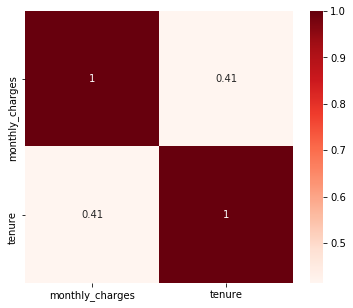

In [7]:
plt.figure(figsize=(6,5))
cor = train_x_scaled_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Write a function, ols_backware_elimination() that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.

In [8]:
import statsmodels.api as sm

def ols_backware_elimination(train_x_scaled_data):
    cols = list(train_x_scaled_data.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = train_x_scaled_data[cols]
        model = sm.OLS(y_train,X_1).fit()
        p = pd.Series(model.pvalues.values[:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE


ols_backware_elimination (train_x_scaled_data)

['monthly_charges', 'tenure']

## Write a function, lasso_cv_coef() that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.

In [9]:
from sklearn.linear_model import LassoCV

In [10]:
reg = LassoCV()
def lasso_cv_coef(train_x_scaled_data):
    reg.fit(train_x_scaled_data, y_train)
    coef = pd.Series(reg.coef_, index = train_x_scaled_data.columns)
    return coef
df=lasso_cv_coef (train_x_scaled_data)
df = pd.DataFrame(df).reset_index()
df.rename(columns = {'index': 'variable', 0 : 'coef'}, inplace = True)
df.head()

variable         coef
0  monthly_charges  2127.303019
1           tenure   742.550633

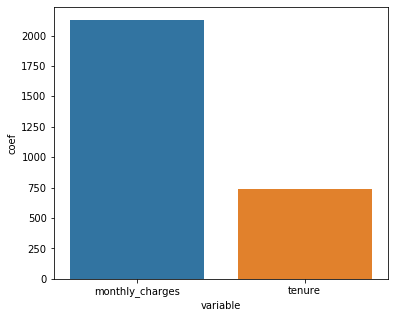

In [11]:
plt.figure(figsize=(6,5))
sns.barplot(x = 'variable', y = 'coef', data = df)
plt.show()

## Write 3 functions, the first computes the number of optimum features (n) using rfe, the second takes n as input and returns the top n features, and the third takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [18]:
def num_optimum_features(x_train, y_train):
    number_of_features_list=np.arange(1,3)
    high_score=0
    number_of_features=0           
    score_list =[]
    for n in range(len(number_of_features_list)):
        model = LinearRegression()
        rfe = RFE(model,number_of_features_list[n])
        x_train_rfe = rfe.fit_transform(x_train, y_train)
        x_test_rfe = rfe.transform(x_test)
        model.fit(x_train_rfe,y_train)
        score = model.score(x_test_rfe, y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            number_of_features = number_of_features_list[n]
    print('high score = ', high_score)
    return number_of_features
number_of_features = num_optimum_features (x_train, y_train)

print("Optimum number of features: %d" %number_of_features)


high score =  0.9612993080783484
Optimum number of features: 2


In [20]:
def top_features(x_train, y_train):
    cols = list(x_train.columns)
    model = LinearRegression()

    #Initializing RFE model
    rfe = RFE(model, 2)

    #Transforming data using RFE
    x_rfe = rfe.fit_transform(x_train,y_train)  

    #Fitting the data to model
    model.fit(x_rfe,y_train)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    return selected_features_rfe

selected_features_rfe = top_features(x_train, y_train)

print(selected_features_rfe)

Index(['monthly_charges', 'tenure'], dtype='object')


In [15]:
def new_dfs(x_train, x_test, selected_features_rfe):
    x_train = x_train['monthly_charges', 'tenure']
    x_test = x_test['monthly_charges', 'tenure']
    return x_train, x_test
print(x_train)

      monthly_charges  tenure
120             49.20      72
1423            19.85       8
389             89.40      72
1136            26.10      67
1503            25.30      66
438             83.70      72
571             80.25       6
656            105.55      53
753             99.65      60
574             90.50      47
1212            20.20      38
1053            97.20      60
1130            19.55      72
1250            19.75      69
1031           109.25      63
772            111.30      71
1402            25.10      72
516             77.30      70
1102            20.65      57
1694            19.75      46
1086            20.20      46
1516            20.60      40
133             72.95      68
1036           105.40      64
72              39.40      48
551             79.10      71
1024           113.65      71
1431            20.10      35
895            114.70      68
1459            19.35      59
...               ...     ...
2               45.05      56
456       

In [16]:
print(x_test)

      monthly_charges  tenure
308             90.35      71
455             59.75      69
914            106.60      61
1420            25.10      65
1557            20.20      35
104             90.60      72
169             40.05      70
1472            20.05      34
1197            25.60      71
1450            23.40      62
812            114.75      70
616             80.85      72
231             68.75      66
336             70.10      48
783            101.15      60
186             86.10      58
211             86.50      68
651            109.55      72
1594            24.35      58
348             67.80      72
958            113.60      55
1198            19.95      68
587             82.65      72
1122            20.40      38
386             64.25      16
208             49.85      64
1232            20.25      36
50              86.65      72
1686            26.10      72
28              85.25      67
...               ...     ...
320             65.65      72
223       